In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5* x**2 + x+2+np.random.normal(0,1,100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [14]:
X2.shape

(100, 3)

In [13]:
X.shape

(100, 1)

In [10]:
X[:5,:]

array([[-2.3945422 ],
       [-1.63874123],
       [-2.45833434],
       [-2.47278832],
       [-0.56861262]])

In [15]:
X2[:5,:]

array([[ 1.        , -2.3945422 ,  5.73383235],
       [ 1.        , -1.63874123,  2.6854728 ],
       [ 1.        , -2.45833434,  6.04340772],
       [ 1.        , -2.47278832,  6.11468209],
       [ 1.        , -0.56861262,  0.32332032]])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg2 = LinearRegression()

In [18]:
lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

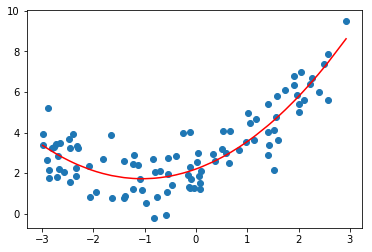

In [21]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [22]:
lin_reg2.coef_

array([ 0.        ,  0.91672661,  0.43660298])

In [23]:
lin_reg2.intercept_

2.2024669391715372

## 关于PolynomialFeatures

In [24]:
X = np.arange(1,11).reshape(-1,2)

In [25]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [26]:
poly = PolynomialFeatures(degree=2)
X2=poly.fit_transform(X)

In [27]:
X2.shape

(5, 6)

In [28]:
X2

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

## Pipeline

In [32]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5* x**2 +x+2+np.random.normal(0,1,100)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### 先进行多项式特征 再进行归一化

In [37]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [38]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

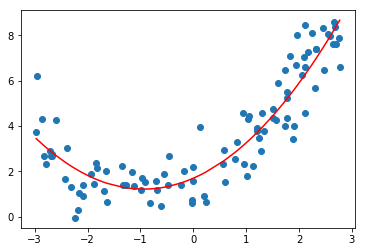

In [40]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()